In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv('../data/raw/president_polls2.csv', parse_dates=['start_date'], 
                  usecols=['question_id', 'poll_id', 'state', 'pollster_id', 'pollster', 'fte_grade', 'sample_size', 
                           'population', 'methodology', 'start_date', 'internal', 'partisan', 'race_id', 'answer',
                           'candidate_party', 'pct'])

In [3]:
df.head()

,question_id,poll_id,state,pollster_id,pollster,fte_grade,sample_size,population,methodology,start_date,internal,partisan,race_id,answer,candidate_party,pct
0,126918,67815,NaN,744,Ipsos,B-,1115,a,Online,2020-07-27,False,NaN,6210,Biden,DEM,57.0
1,126918,67815,NaN,744,Ipsos,B-,1115,a,Online,2020-07-27,False,NaN,6210,Trump,REP,43.0
2,126919,67815,NaN,744,Ipsos,B-,947,rv,Online,2020-07-27,False,NaN,6210,Biden,DEM,57.0
3,126919,67815,NaN,744,Ipsos,B-,947,rv,Online,2020-07-27,False,NaN,6210,Trump,REP,43.0
4,126934,67820,NaN,568,YouGov,B,1260,rv,Online,2020-07-26,False,NaN,6210,Biden,DEM,49.0


In [4]:
df2 = df[['start_date', 'candidate_party', 'pct']]

In [5]:
df2 = df2[(df2.candidate_party == 'DEM') | (df2.candidate_party == 'REP')]

In [6]:
df2 = df2.pivot_table(index='start_date', columns='candidate_party', values = 'pct', aggfunc='mean')

In [7]:
df2['two_party_sum'] = df2['DEM'] + df2['REP']
df2['DEM'] = df2['DEM'] / (df2['two_party_sum'])
df2['REP'] = df2['REP'] / (df2['two_party_sum'])
df2 = df2.drop('two_party_sum', axis=1)

In [8]:
df2_mean = df2.resample('w').mean().dropna()
df2_min = df2.resample('w').min().dropna()
df2_max = df2.resample('w').max().dropna()

Text(0, 0.5, 'Polling percentage')

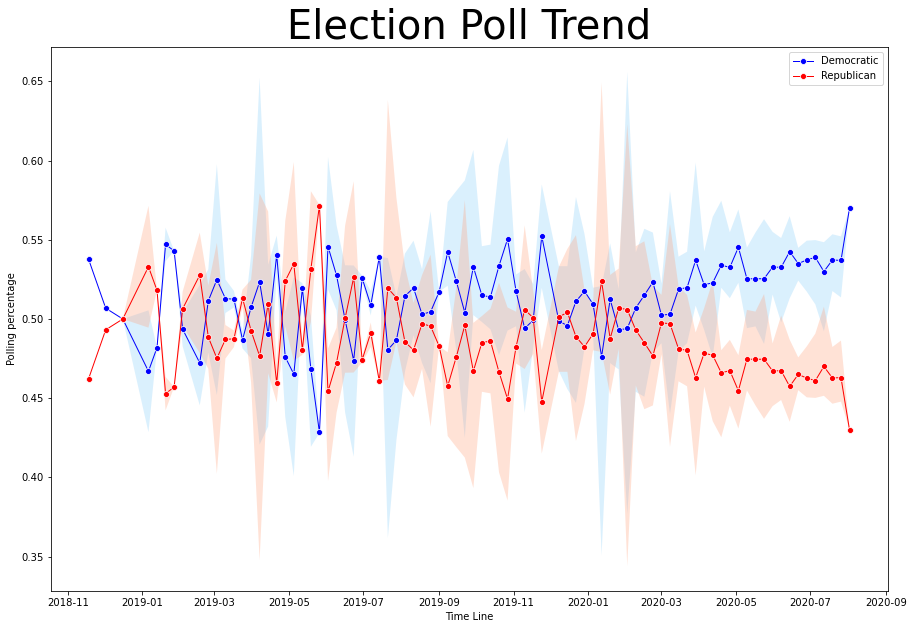

In [13]:
fig, ax = plt.subplots(figsize = (15,10)) 
ax = sns.lineplot(df2_mean.index, df2_mean['DEM'], color = 'blue', marker = 'o', linewidth = 1.0, label = 'Democratic', 
                  linestyle='dotted')
ax.fill_between(df2_mean.index, df2_min['DEM'], df2_max['DEM'],\
                facecolor ='lightskyblue', alpha = 0.3) 
ax = sns.lineplot(df2_mean.index, df2_mean['REP'], color = 'red', marker = 'o', linewidth = 1.0, label = 'Republican',
                  linestyle='dotted')
ax.fill_between(df2_mean.index, df2_min['REP'], df2_max['REP'],\
                facecolor ='lightsalmon', alpha = 0.3) 

ax.set_title('Election Poll Trend', size=40)
ax.set_xlabel('Time Line')
ax.set_ylabel('Polling percentage')

In [72]:
df2_mean.head()

candidate_party,DEM,REP
start_date,,
2018-11-30,0.522223,0.477777
2018-12-31,0.500000,0.500000
2019-01-31,0.505016,0.494984
2019-02-28,0.497018,0.502982
2019-03-31,0.506081,0.493919


In [81]:
def dem_voting_smaple_generator(dem, size = 1000):
    return pd.DataFrame({'vote' : np.where(np.random.random(size = 1000) > dem, 'gop', 'dem')})

def gop_voting_smaple_generator(gop, size = 1000):
    return pd.DataFrame({'vote' : np.where(np.random.random(size = 1000) > gop, 'dem', 'gop')})

def get_sample_distribution(dem, gop, size = 1000):   
    df_dem = pd.DataFrame([dem_voting_smaple_generator(dem).vote.value_counts(normalize=True) for i in range(100)])
    df_gop = pd.DataFrame([gop_voting_smaple_generator(gop).vote.value_counts(normalize=True) for i in range(100)])
    dem_list = np.array(df_dem.dem.values)
    gop_list = np.array(df_gop.gop.values)
    return dem_list, gop_list

In [82]:
df2_mean[['dem_list', 'gop_list']] = df2_mean.apply(
    lambda x : get_sample_distribution(x['DEM'], x['REP']), axis =1, result_type='expand')

In [83]:
df2_mean.head()

candidate_party,DEM,REP,dem_list,gop_list
start_date,,,,
2018-11-30,0.522223,0.477777,"[0.502, 0.514, 0.528, 0.547, 0.55, 0.539, 0.50...","[0.467, 0.483, 0.467, 0.486, 0.487, 0.483, 0.4..."
2018-12-31,0.500000,0.500000,"[0.515, 0.484, 0.496, 0.514, 0.504, 0.512, 0.4...","[0.514, 0.509, 0.491, 0.513, 0.495, 0.476, 0.5..."
2019-01-31,0.505016,0.494984,"[0.52, 0.501, 0.522, 0.526, 0.482, 0.518, 0.52...","[0.504, 0.5, 0.489, 0.526, 0.498, 0.504, 0.476..."
2019-02-28,0.497018,0.502982,"[0.51, 0.499, 0.502, 0.508, 0.494, 0.48, 0.488...","[0.521, 0.503, 0.503, 0.479, 0.5, 0.511, 0.52,..."
2019-03-31,0.506081,0.493919,"[0.504, 0.516, 0.493, 0.493, 0.527, 0.497, 0.5...","[0.507, 0.475, 0.517, 0.499, 0.492, 0.481, 0.5..."


<ipython-input-84-f5859cb9f54f>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = (10,6))


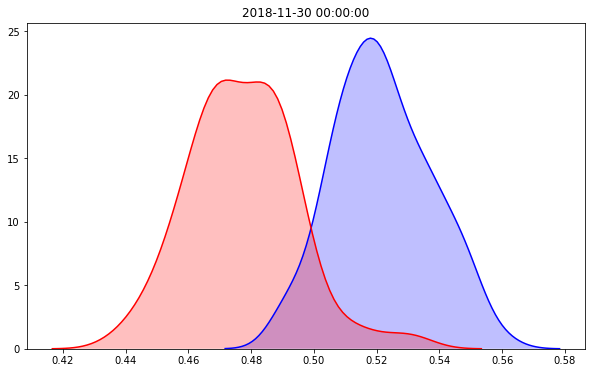

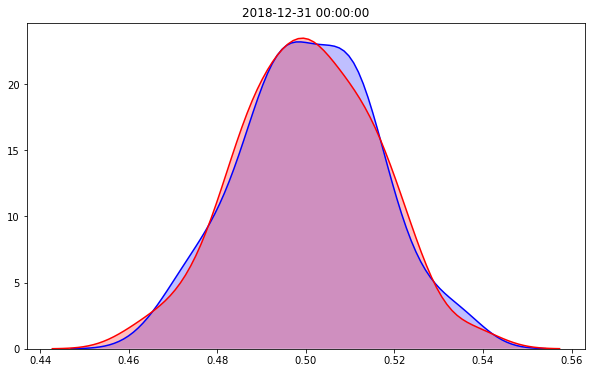

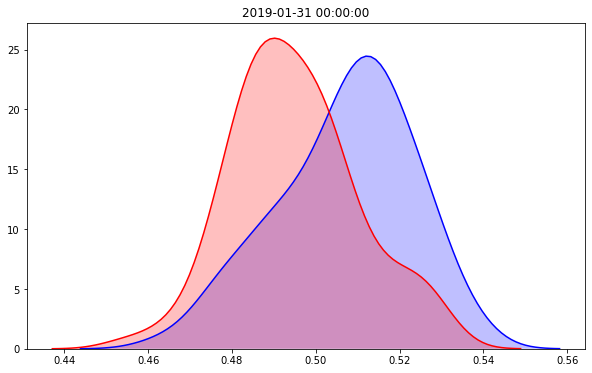

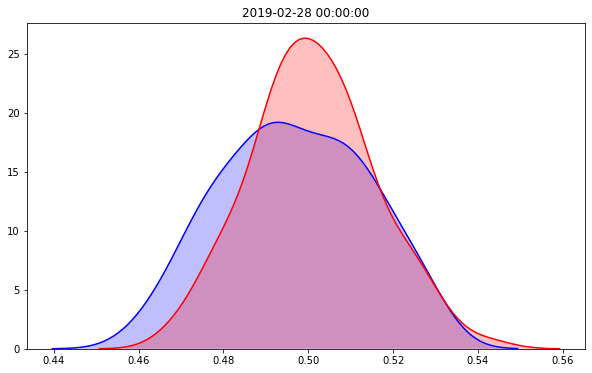

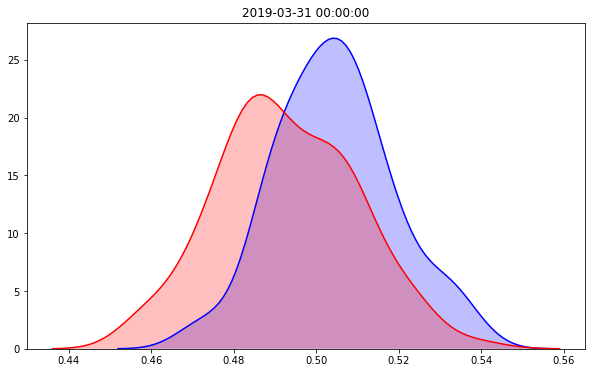

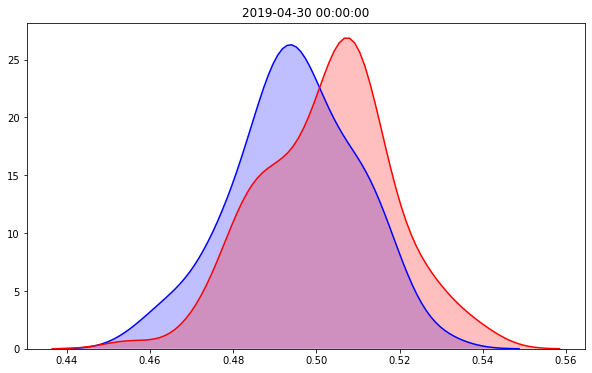

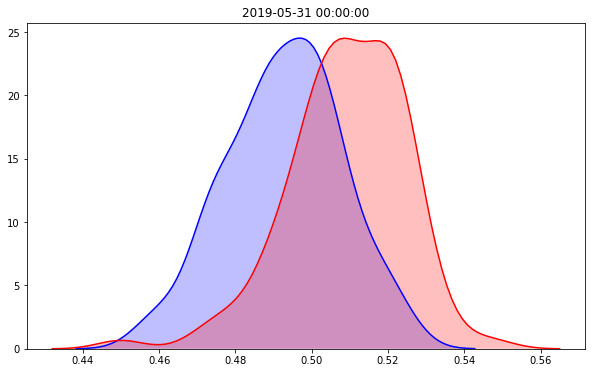

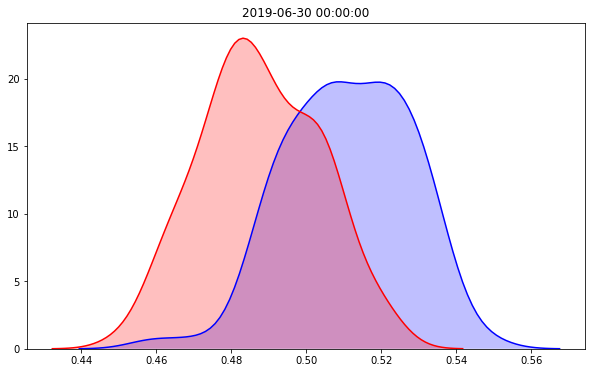

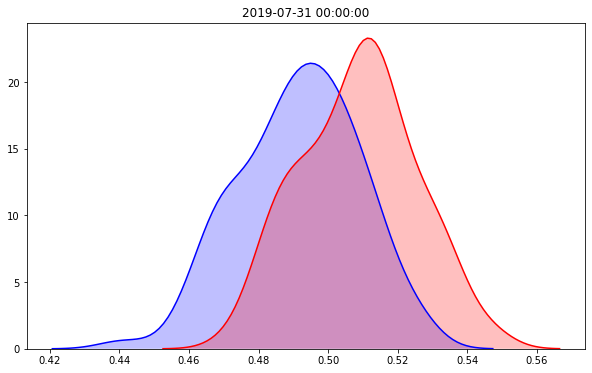

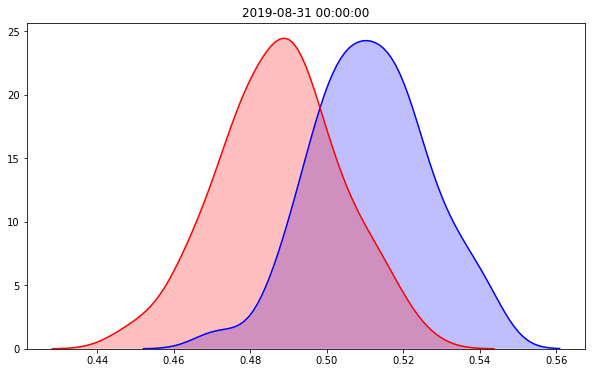

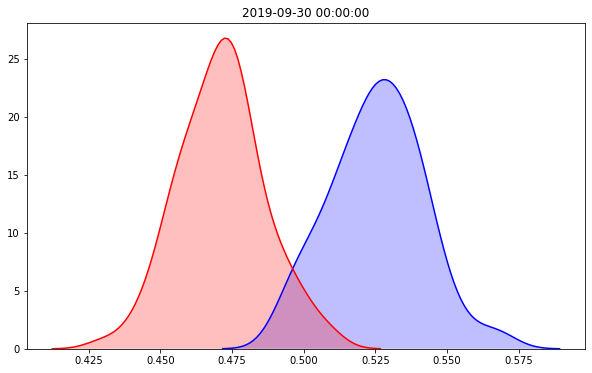

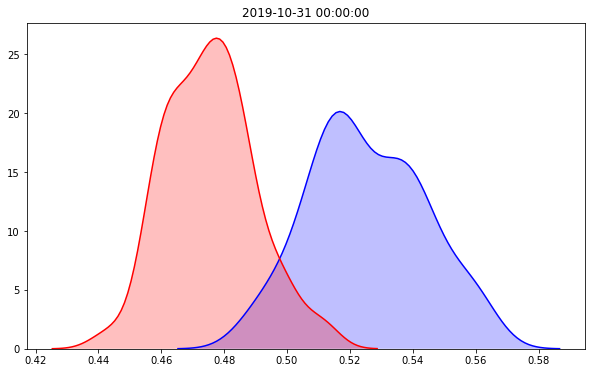

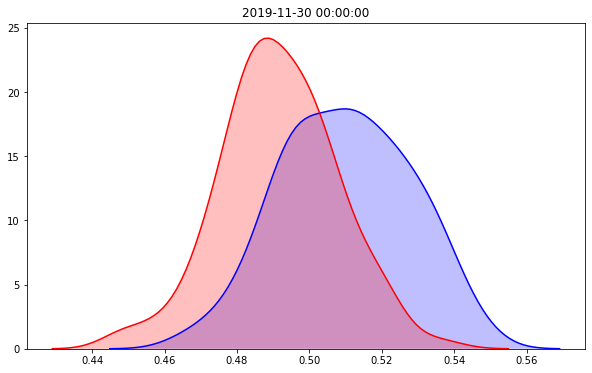

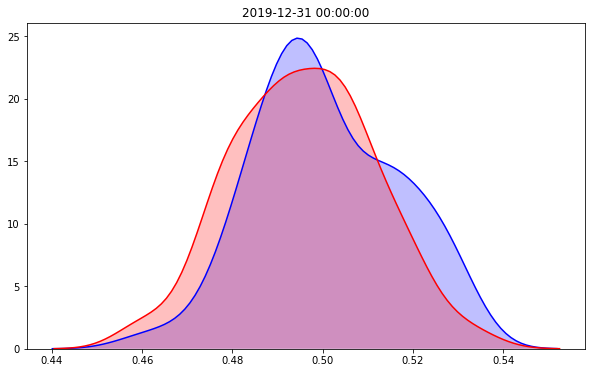

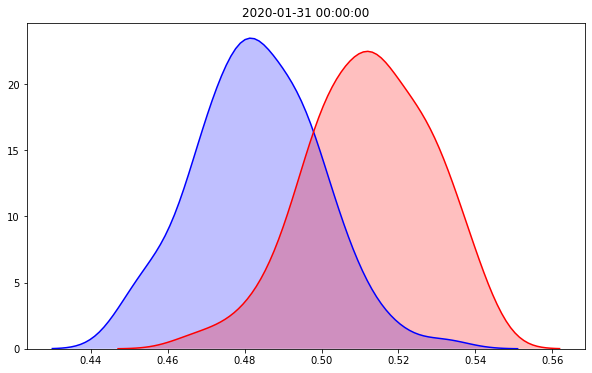

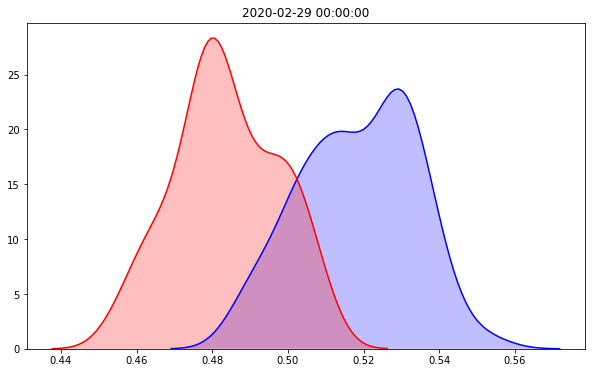

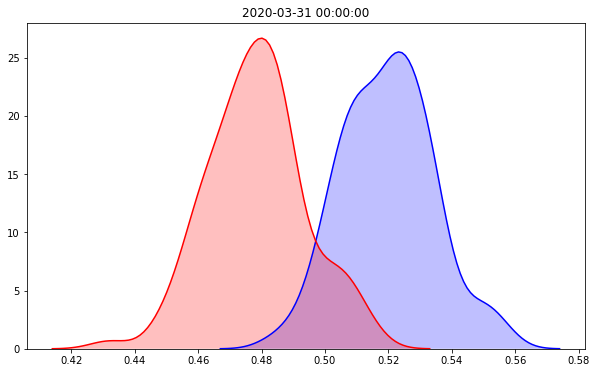

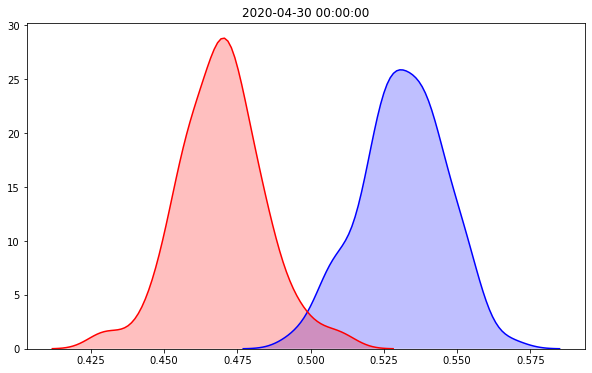

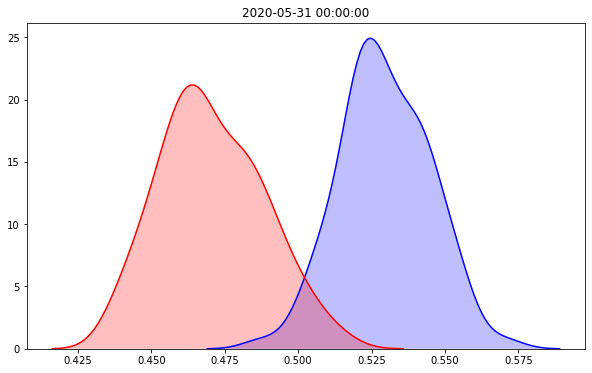

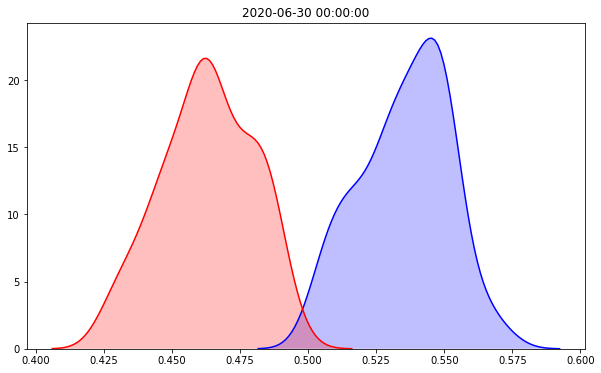

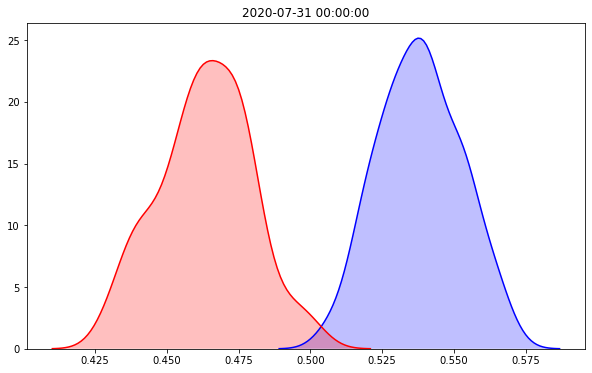

In [84]:
n = len(df2_mean)
dates = df2_mean.index
for i in range(n):
    fig, ax = plt.subplots(figsize = (10,6))
    row = df2_mean.iloc[i,:]
    sns.kdeplot(row.dem_list, shade=True, color='b')
    sns.kdeplot(row.gop_list, shade=True, color='r')
    ax.set_title(dates[i])
    plt.savefig('../reports/figures' + str(i)  + '.png')